In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pywaffle import Waffle
from wordcloud import WordCloud,STOPWORDS
import requests
import networkx as nx
import folium
import re

In [4]:
df=pd.read_csv('Datasets/supermarket_sales.csv')

In [6]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.describe(exclude=np.number)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,841-18-8232,A,Yangon,Member,Female,Fashion accessories,02-07-2019,14:42,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [9]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       4
gross margin percentage    0
gross income               0
Rating                     5
dtype: int64

In [11]:
df['Rating']=df.Rating.fillna(df.mean())

In [14]:
df=df.fillna(df.mean())

In [15]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [26]:
df[df['Customer type']=='Member']['Total'].sum()

164223.44400000002

In [27]:
df[df['Customer type']=='Normal']['Total'].sum()

158743.305

In [ ]:
1. 4
2. 6
3. box plot lower line(LL) BOXPLOT QUANTILE(Q1)
5. AXIS=0(DEFAULT, FOR PANDA) ROW AXIS=1 COLUMN (ans=0)
6. ABC123XYZ
7. [] #cause 'hello world' is not in 'hello'
8.(1,)
11.(2, )
12. 5
13. 2
#dictonary dataframe=column
#list dATAFRAME ROW [][]
#DF[0] GIVESCOLUMN VALUE NOT ROWS

In [30]:
df=pd.read_csv('Datasets/train.csv')

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
df.info() # basic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df=df.dropna()
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [41]:
df.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,183,183,183,183,183
unique,183,2,127,133,3
top,"Behr, Mr. Karl Howell",male,19950,C23 C25 C27,S
freq,1,95,4,4,116


<AxesSubplot:>

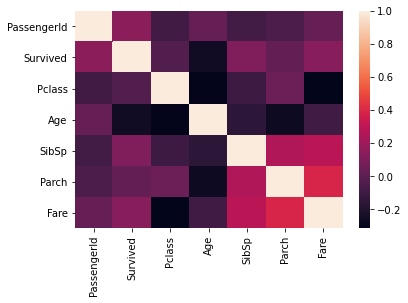

In [43]:
sns.heatmap(data=df.corr())

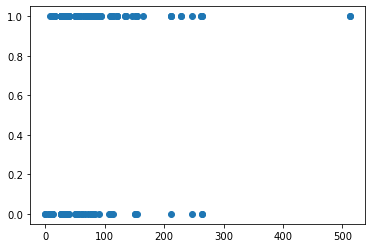

In [44]:
# 6.
plt.scatter(df.Fare,df.Survived)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

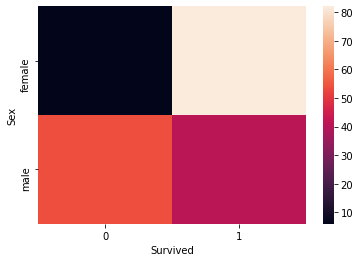

In [47]:
#7.
sns.heatmap(data=pd.crosstab(df.Sex,df.Survived))

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


<AxesSubplot:>

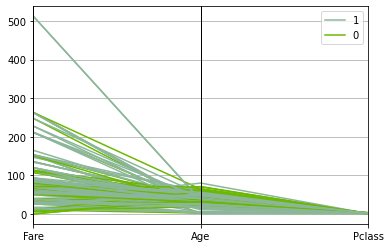

In [54]:
#8.
pd.plotting.parallel_coordinates(df,'Survived',cols=['Fare','Age','Pclass'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

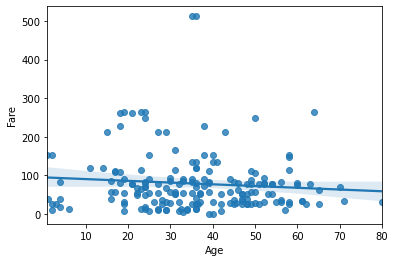

In [57]:
#9.
sns.regplot(x=df.Age,y=df.Fare)

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>]], dtype=object)

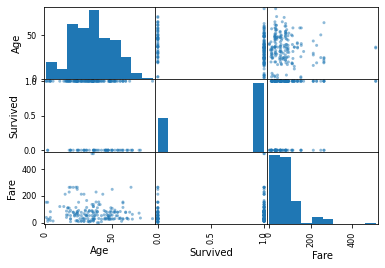

In [58]:
#10.
pd.plotting.scatter_matrix(df[['Age','Survived','Fare']])

In [61]:
#11.
pd.crosstab(df.Sex,df.Survived,margins=True,normalize=True)

Survived,0,1,All
Sex,,,
female,0.032787,0.448087,0.480874
male,0.295082,0.224044,0.519126
All,0.327869,0.672131,1.000000


In [67]:
#11. OR
x=df[df.Sex=='male'].shape[0]
y=df[(df.Sex=='male')&(df.Survived==1)].shape[0]
y/x

0.43157894736842106

In [68]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


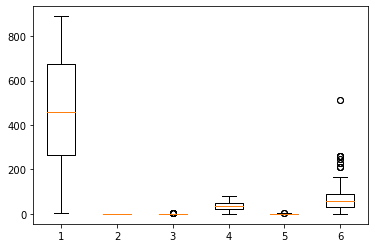

In [74]:
#12.
plt.boxplot(df[['PassengerId','Survived','Pclass','Age','SibSp','Fare']])
plt.show()

In [83]:
#13.
q1=df.Fare.quantile(0.25)
q3=df.Fare.quantile(0.75)
IQR=q3-q1
LL=q1-1.5*IQR
UL=q3+1.5*IQR
df=df[(df.Fare<UL)&(df.Fare>LL)]

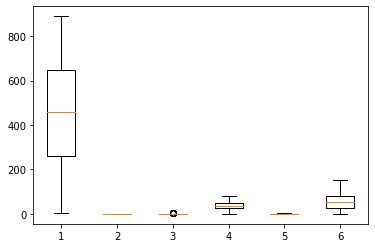

In [84]:
#14.
plt.boxplot(df[['PassengerId','Survived','Pclass','Age','SibSp','Fare']])
plt.show()

In [102]:
#15.
l=[]
for i in df.Age:
    if i<18:
        l.append('children')
    elif i<30:
          l.append('Adults')
    elif i<50:
          l.append('young Adults')
    elif i<100:
          l.append('SENIOR')
df.AgeGroup=np.array(l)
#df.AgeGroup=pd.cut(df.Age,bins=[0,18,30,50,100],labels=['c','a','ya','se'])

In [103]:
df.AgeGroup

array(['young Adults', 'young Adults', 'SENIOR', 'children', 'SENIOR',
       'young Adults', 'Adults', 'young Adults', 'SENIOR', 'young Adults',
       'Adults', 'Adults', 'young Adults', 'SENIOR', 'Adults', 'Adults',
       'young Adults', 'young Adults', 'SENIOR', 'Adults', 'young Adults',
       'Adults', 'young Adults', 'Adults', 'SENIOR', 'SENIOR', 'SENIOR',
       'children', 'children', 'young Adults', 'SENIOR', 'children',
       'young Adults', 'young Adults', 'young Adults', 'young Adults',
       'young Adults', 'young Adults', 'young Adults', 'Adults', 'SENIOR',
       'young Adults', 'SENIOR', 'young Adults', 'SENIOR', 'young Adults',
       'young Adults', 'SENIOR', 'Adults', 'young Adults', 'children',
       'children', 'children', 'young Adults', 'Adults', 'young Adults',
       'young Adults', 'young Adults', 'children', 'young Adults',
       'young Adults', 'Adults', 'young Adults', 'young Adults',
       'children', 'Adults', 'Adults', 'SENIOR', 'Adults', 'Adults'

In [104]:
pd.crosstab(df.AgeGroup,df.Survived)

Survived,0,1
row_0,,
Adults,10,27
SENIOR,18,16
children,2,16
young Adults,26,51


In [85]:
#16.
df[df['Pclass']==1]['Fare'].sum()

9450.070899999999

In [86]:
#16.
df[df['Pclass']==2]['Fare'].sum()

276.6667

In [87]:
#16.
df[df['Pclass']==3]['Fare'].sum()

110.27499999999999

In [91]:
#16.
for i in range(1,4):
    print(df[df['Pclass']==i]['Fare'].sum())

9450.070899999999
276.6667
110.27499999999999


In [ ]:
#10 MCQ 
# 5 PANDA
# 5 REGEX
#3MARKS
#  NETWORK X
#  PYWAFFLE
#  WORKCLOUD
#  FILL_BETWEEN

FOR EXAM
#  NETWORK X
#  PYWAFFLE
#  WORKCLOUD
#  FILL_BETWEEN
# STACKPLOT

#9MARKS 
#Analysis paper gien by sir
